## digit_recognizer 手写数字识别

手写数字识别作为机器学习的入门项目，非常手动各种模型，算法的青睐，新的算法，模型也首选该数据集作为用于测试。 
同时作为kaggle的入门题目，本篇博客打算使用kaggle提供的数据集，借助tensorflow， 使用基础API,高层API分别实现ANN， CNN， RNN， 
来进行数据训练和预测。

更基础的titanic项目：https://github.com/yunshuipiao/sw-kaggle/blob/master/titanic/01.ipynb

In [70]:
# 常用包的导入
import numpy as np
import pandas as pd
import sklearn
import sklearn.preprocessing
import sklearn.model_selection
import  matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
# import warnings

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [48]:
# 加载数据
train_df = pd.read_csv('./datasets/train.csv')
test_df = pd.read_csv('./datasets/test.csv')
sample_df = pd.read_csv('./datasets/sample_submission.csv')

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [7]:
train_df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [8]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


通过对数据简单的分析，可以知道：  
label是需要预测的结果，为0-9, pixel0-pixel783共计28*28个像素， 为输入特征， 范围在0-255之间，后续需要标准化数据.

## 数据可视化

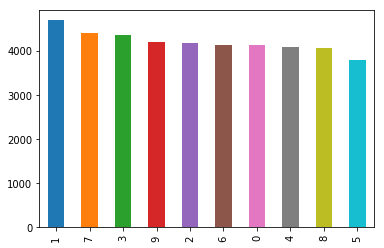

In [13]:
train_df['label'].value_counts().plot.bar()  #每个数字的预测分布

In [15]:
# 定义函数查看图片
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image)

9


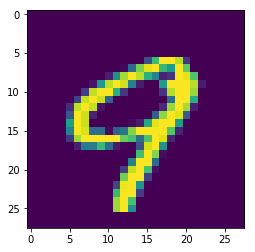

In [47]:
images = train_df.drop('label', axis=1).values
plot_digit(images[100])
print(train_df.iloc[100]['label'])

In [64]:
X_train = train_df[[i for i in train_df.columns if i not in ['label']]]
y_train = train_df['label']
X_test = test_df

## 数据处理

In [65]:
# 标准化数据， 查看前后对比结果
X_train = sklearn.preprocessing.scale(X_train)
X_test = sklearn.preprocessing.scale(X_test)

In [66]:
# PCA降维，查看前后对比结果

In [67]:
y_train_one_hot = pd.get_dummies(y_train, prefix='label')

In [71]:
# 切分数据为训练集和验证集
X_train, X_verify, y_train, y_verify, y_train_one_hot, y_verify_one_hot = sklearn.model_selection.train_test_split(X_train, 
                                                                                                                   y_train,
                                                                                                                   y_train_one_hot, 
                                                                                                                   stratify=y_train, 
                                                                                                                   test_size=0.1
                                                                                                                  )

In [74]:
y_train_one_hot.shape, y_verify.shape

((37800, 10), (4200,))